# object detection

Tools
- openCV
- matplotlib,pyplot
- coco.names
- mobilenet SSD


- Open CV?
   - OpenCV is a cross-platform library using which we can develop real-time computer vision applications. It mainly focuses on image processing, video capture and analysis including features like face detection and object detection.
        
- Frozen_inference_graph?
     - it is a trained model which is udes to identofy the objects.
 
- mobilenet ssd 
  - The mobilenet-ssd model is a Single-Shot multibox Detection (SSD) network intended to perform object detection
  
Let's begin with image detection then jumping onto real-time video detection.

# Image detection

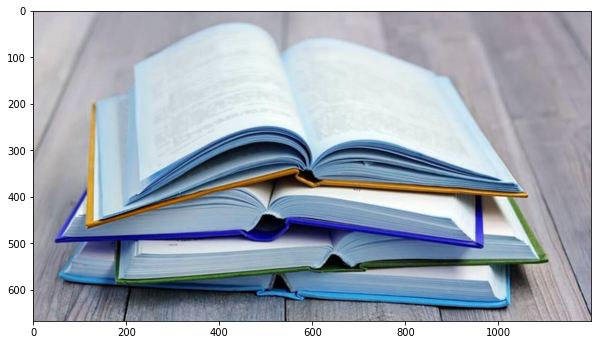

In [1]:
import cv2 #importing cv2
import matplotlib.pyplot as plt #importing matplotlib 
img = cv2.imread('im11.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(img)

In [2]:
#done with image loading 
#imporitng names of the coco dataset
classnames = []
classfile = 'coco.names'

with open (classfile, 'rt') as f:
    classnames = f.read().rstrip('\n').split('\n')
    
for i in classnames:
    print(i)

person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
street sign
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
hat
backpack
umbrella
shoe
eye glasses
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
plate
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
mirror
dining table
window
desk
toilet
door
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
blender
book
clock
vase
scissors
teddy bear
hair drier
toothbrush
hair brush


In [8]:
#configuration file
#creating a function which can detect objects in the image
def detect_image(image):
    img = cv2.imread(image)

    congifpath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
    weights = 'frozen_inference_graph.pb'

    net = cv2.dnn_DetectionModel(weights, congifpath)
    net.setInputSize(320, 320)
    net.setInputScale(1.0 / 127.5)
    net.setInputMean((127.5, 127.5, 127.5))
    net.setInputSwapRB(True)

    classids, confs, bbox = net.detect(img, confThreshold = 0.5)


    if len(classids) !=0:
        for classid, confidence, box in zip(classids.flatten(), confs.flatten(), bbox):
            cv2.rectangle(img, box, color =(225,0, 0), thickness = 2) #creates a bounding box
            cv2.putText(img, classnames[classid - 1].upper(), (box[0] + 10, box[1]+ 30),cv2.FONT_HERSHEY_COMPLEX,1,( 255,0, 0), 1 ) # adds text


    plt.figure(figsize=(10, 10))           
    plt.imshow(img)


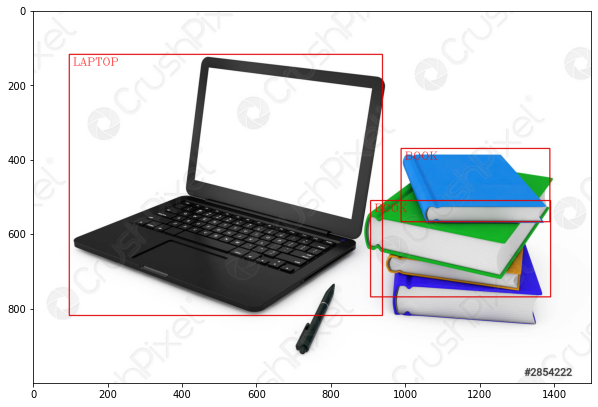

In [9]:
detect_image('im10.jpg')

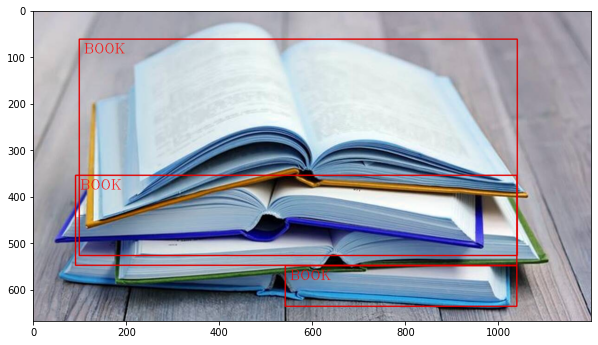

In [10]:
detect_image('im11.jpg')

This is how, we can detect object in using mobile net. Moving towards real-time video detection.

# Real-time Video object detection

- Code for real-time video object detection is similar with image object detection, only some changes are made which I'll be highlighting with th e help of comments.

 let's go!

In [6]:
cap = cv2.VideoCapture(0) #instead of mention image, here we are going to use cv2.videoCapture() to get 
#a video capture for the camera.
cap.set(3,1280) #setting width and height
cap.set(4,720)
cap.set(10,70)

classnames = []
classfile = 'coco.names'

with open (classfile, 'rt') as f:
    classnames = f.read().rstrip('\n').split('\n')
    
# print(classnames)

congifpath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weights = 'frozen_inference_graph.pb'

net = cv2.dnn_DetectionModel(weights, congifpath)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

while True:
    success, img = cap.read()
    classids, confs, bbox = net.detect(img, confThreshold = 0.5) #detecting objects #setting threshold  to detect objects 

    if len(classids) !=0:
        for classid, confidence, box in zip(classids.flatten(), confs.flatten(), bbox):
            cv2.rectangle(img, box, color =(0, 225, 0), thickness = 2)
            cv2.putText(img, classnames[classid - 1].upper(), (box[0] + 10, box[1]+ 30), cv2.FONT_HERSHEY_COMPLEX,1,(0, 255, 0), 2 )

            
            
    cv2.imshow("Output", img)
    cv2.waitKey(1)

Done with real-time video object detection as well.

Thank you!